In [2]:
%pip install langgraph langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 10.9 MB/s eta 0:00:00


In [3]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [4]:
load_dotenv()

False

After adding your `OPENAI_API_KEY` to Colab secrets, you can access it like this:

In [7]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [8]:
model = ChatOpenAI()

In [9]:
# create a state

class LLMState(TypedDict):

    question: str
    answer: str

In [10]:
def llm_qa(state: LLMState) -> LLMState:

    # extract the question from state
    question = state['question']

    # form a prompt
    prompt = f'Answer the following question {question}'

    # ask that question to the LLM
    answer = model.invoke(prompt).content

    # update the answer in the state
    state['answer'] = answer

    return state

In [17]:
# create our graph

graph = StateGraph(LLMState)

# add nodes
graph.add_node('llm_qa', llm_qa)

# add edges
graph.add_edge(START, 'llm_qa')
graph.add_edge('llm_qa', END)

# compile
workflow = graph.compile()

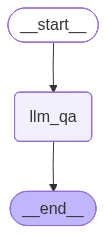

In [19]:
workflow

In [18]:
# execute

intial_state = {'question': 'How far is moon from the earth?'}

final_state = workflow.invoke(intial_state)

print(final_state['answer'])



The average distance from the moon to Earth is about 238,855 miles (384,400 kilometers).


In [12]:
model.invoke('How far is moon from the earth?').content

'The average distance from the Earth to the Moon is about 384,400 kilometers (238,855 miles).'